In [9]:
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.lines as mlines
from math import sqrt, cos, sin, asin, pi
import pylab

In [83]:
margin = 0.5
n = 10
tick_size = 0.5

c = 1490 #Скорость звука при температуре 22 градуса
try:
    deltat10 = float(input('Введите задержку (s): '))
    deltal10 = deltat10*c
    print('Расстояние задержки между p1 и p0: {} m'.format(deltal10))
except ValueError:
    print('Вы не ввели данные для рассчётов')

Введите задержку (s): 0.000341
Расстояние задержки между p1 и p0: 0.50809 m


In [100]:
# Определяем углы треугольника
left = np.r_[0, 0]
right = np.r_[0.96, 0]
top = np.r_[0.48, 3**0.48 / 2]
triangle = np.c_[left, right, top, left]

In [101]:
#Определяем фронт
x1, y1 = [0, 0],[0, sqrt(0.96**2-0.48**2)], #Параллель ребру р1 и р2
x2, y2 = [0.48, 0],[sqrt(0.96**2-0.48**2), sqrt(0.96**2-0.48**2)] #Перпендикуляр ребру р1 и р2
alfa_radian = sin(deltal10/0.96)
#print(deltal10/0.96)
alfa_gradus = asin(alfa_radian)
#print(alfa_gradus)
alfa_gradus=alfa_gradus/pi*180
print(alfa_gradus)
#x3, y3 = [0.48, 0.48-deltal10],[sqrt(0.96**2-0.48**2), sqrt(0.96**2-0.48**2)] # 
polarX=2*cos(1.05+alfa_radian)
polarY=2*sin(1.05+alfa_radian)
x4, y4 = [0.48-polarX, 0.48+polarX],[0.56-polarY,0.56+polarY]

print(x4,y4)

30.32438813833542
[0.4481988571493405, 0.5118011428506595] [-1.4397471558458064, 2.5597471558458063]


In [102]:
#Наносим насечки на треугольник
def plot_ticks(start, stop, tick, n):
    r = np.linspace(0, 1, n+1)
    x = start[0] * (1 - r) + stop[0] * r
    x = np.vstack((x, x + tick[0]))
    y = start[1] * (1 - r) + stop[1] * r
    y = np.vstack((y, y + tick[1]))
    pyplot.plot(x, y, 'k', lw=1)

In [103]:
# Определяем вектора насечек
bottom_tick = tick_size * (right - top) / n
right_tick = tick_size * (top - left) / n
left_tick = tick_size * (left - right) / n

# Окружность вокруг пирамидки
#circle = pylab.Circle((0.48, 0.56), radius=0.5, fill=False, color="r")

In [104]:
#Наносим насечки на график
plot_ticks(left, right, bottom_tick, n)
plot_ticks(right, top, right_tick, n)
plot_ticks(left, top, left_tick, n)

Фронт отклонён от грани р0-р1 на 30.32 градусов


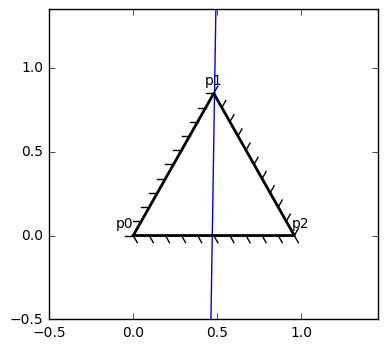

In [105]:
print('Фронт отклонён от грани р0-р1 на {:.2f} градусов'.format(alfa_gradus))

pyplot.plot(
    #x1, y1,
    #x2, y2,
    #x3, y3,
    x4, y4,
    marker='o')
#pyplot.plot(circle,'k', lw=2)
pyplot.plot(triangle[0], triangle[1], 'k', lw=2) 
pyplot.axis([left[0]-margin, right[0]+margin, left[1]-margin, top[1]+margin])
pyplot.gca().set_aspect('equal', adjustable='box')
pylab.text (-0.05, 0.05, "p0", horizontalalignment="center")
pylab.text (0.48, 0.9, "p1", horizontalalignment="center")
pylab.text (1, 0.05, "p2", horizontalalignment="center")
pyplot.show()   